# 数据清洗及可视化 pandas seaborn
使用 Pandas 数据分析工具、Seaborn 统计分析可视化工具

实验知识点

离群点分析
缺失值处理
偏态分布数据处理


In [3]:
!wget -nc http://labfile.oss.aliyuncs.com/courses/1001/train.csv #数据来源www.kaggle.com

File `train.csv' already there, will not retrieve.
--18:34:33--  http://#数据来源www.kaggle.com:80/
           => `index.html'
Connecting to #数据来源www.kaggle.com:80... 
#数据来源www.kaggle.com: Host not found.

FINISHED --18:34:34--
Downloaded: 0 bytes in 0 files


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('train.csv') #读取数据，命名为 data
data.head(5) #查看 data 前5行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.columns #查看特征向量

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 特征说明
PassengerId: 编号  
Survived: 0 = 死亡，1 = 生存   
Pclass: 船票级别 1 = 高级， 2 = 中等， 3 = 低等  
Name: 名称  
Sex: male = 男性，female = 女性  
Age: 年龄  
SibSp: 在 Titanic 上的兄弟姐妹以及配偶的人数  
Parch: 在 Titanic 上的父母以及子女的人数  
Ticket: 船票编号  
Fare: 工资  
Cabin: 所在的船舱  
Embarked: 登船的港口 C = Cherbourg, Q = Queenstown, S = Southampton 

## 检查数据

In [6]:
len(data) #数据集长度

891

In [7]:
data.isnull().sum()  #查看 null 值，查看非空使用 notnull()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 检测类别是否平衡！！！

总共有 891 个游客的数据，177 个 Age 缺失，687 个 Cabin 缺失，2 个 Embarked 缺失。在后面我们需要用不同的方法补充这些数据。  
然后，我们查看特征类别分布是否平衡。类别平衡指分类样例不同类别的训练样例数目差别不大。  
当差别很大时，为类别不平衡。当类别不平衡的时候，例如正反比为 9:1，学习器将所有样本判别为正例的正确率都能达到 0.9。  
这时候，我们就需要使用 “再缩放”、“欠采样”、“过采样”、“阈值移动” 等方法。

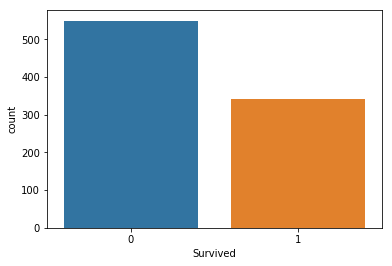

In [8]:
sns.countplot(x='Survived',data=data) #对不同值的 'Survived' 进行计数并绘图

图的纵坐标表示在不同类别下的人数。相差不是特别大，我们认为属于类别平衡问题。  
### 接下来，我们查看特征值分布和格式。  
在这里，我们观察每个特征特征值是什么格式，怎么分布，维度如何。

Cabin, Embarked 等特征值数值化   
Ticket 等高维数据降维处理并将特征值数值化  
Fare，Age 等为连续数据，之后需要检查是否是偏态数据

In [9]:
#接下来，删除无用的特征 PassengerId, Name。

data.drop(['PassengerId','Name'],axis=1,inplace=True) #删除 data['PassengerId','Name'] 两列数据，axis=1 表示删除列，axis=0 表示删除行，inplace=True 原位删除
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

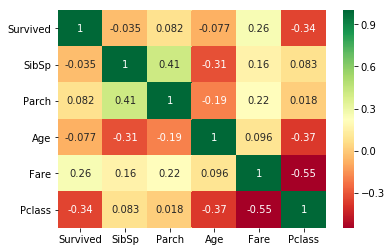

In [10]:
g=sns.heatmap(data[['Survived','SibSp','Parch','Age','Fare','Pclass']].corr(),cmap='RdYlGn',annot=True) #corr() 计算相关系数，cmap 选择 color map，annot=True 显示相关系数

In [11]:
data[['Survived','SibSp','Parch','Age','Fare','Pclass']]

,Survived,SibSp,Parch,Age,Fare,Pclass
0,0,1,0,22.0,7.2500,3
1,1,1,0,38.0,71.2833,1
2,1,0,0,26.0,7.9250,3
3,1,1,0,35.0,53.1000,1
4,0,0,0,35.0,8.0500,3
5,0,0,0,NaN,8.4583,3
6,0,0,0,54.0,51.8625,1
7,0,3,1,2.0,21.0750,3
8,1,0,2,27.0,11.1333,3
9,1,1,0,14.0,30.0708,2


In [12]:
import numpy as np
import pandas as pd
import pandas_profiling
data[['Survived','SibSp','Parch','Age','Fare','Pclass']].profile_report(style={'full_width':True})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


sibsp parch  
fare parch survived  


### 处理缺失值  
根据不同的情况，可以使用中位数、平均值、众数填充，删除等方法处理缺失数据，更复杂的还有建模预测。  

Age
作图 Age ~ Survived。年龄较小的孩子生存的几率大。补充缺失值后，我们必须检查是否对 Age ~ Survived 的性质产生影响。  

#### 年龄与别的元素以及是否存活的图

In [7]:
Age0

0      22.0
4      35.0
6      54.0
7       2.0
12     20.0
13     39.0
14     14.0
16      2.0
18     31.0
20     35.0
24      8.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
40     40.0
41     27.0
49     18.0
50      7.0
51     21.0
54     65.0
57     28.5
59     11.0
60     22.0
62     45.0
63      4.0
67     19.0
       ... 
833    23.0
834    18.0
836    21.0
840    20.0
841    16.0
843    34.5
844    17.0
845    42.0
847    35.0
848    28.0
850     4.0
851    74.0
852     9.0
854    44.0
860    41.0
861    21.0
864    24.0
867    31.0
870    26.0
872    33.0
873    47.0
876    20.0
877    19.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
890    32.0
Name: Age, Length: 424, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


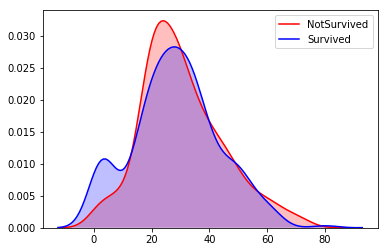

In [6]:
Age0=data[(data['Survived']==0)&(data['Age'].notnull())]['Age'] #死亡乘客的 Age 数据
Age1=data[(data['Survived']==1)&(data['Age'].notnull())]['Age'] #生存乘客的 Age 数据
g=sns.kdeplot(Age0,legend=True,shade=True,color='r',label='NotSurvived') #死亡乘客年龄概率分布图， shade=True 设置阴影
g=sns.kdeplot(Age1,legend=True,shade=True,color='b',label='Survived') #生存乘客概率分布图

箱形图最大的优点就是不受异常值的影响，能够准确稳定地描绘出数据的离散分布情况，同时也利于数据的清洗。

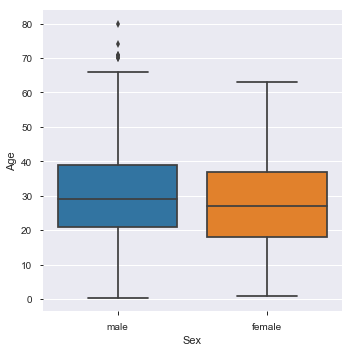

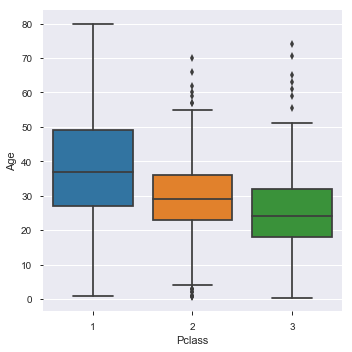

In [15]:
#在 2.2.2 节中，根据 heatmap, Age 和 SibSp, Parch, Pclass 相关性高，我们再用箱型图直观感受下，以图形 Sex ~ Age, Pclass ~ Age 为例。

g=sns.factorplot(x='Sex',y='Age',data=data,kind='box') 
g=sns.factorplot(x='Pclass',y='Age',data=data,kind='box')

上面两图说明男性和女性的年龄分布（指箱型图中的五条线，从上到下依次是最大值、四分位数、  
中位数、四分位数、最小值）基本一致，而购买不同等级票的人的年龄分布是不同的。  
所以，我们根据票的等级将数据分为不同的集合，再用缺失数据所在集合的平均值来进行填充  
，并检查填充后 Age ~ Survived 是否受到影响。  

In [14]:
data[data['Age'].isnull()]['Age'][5]==float64('nan')

NameError: name 'float64' is not defined

In [23]:
data[data['Age'].isnull()]['Age']

Series([], Name: Age, dtype: float64)

In [25]:
data['Age'][5]

28.235555555555557

In [26]:
data['Age'][863]

29.69911764705882

In [27]:
data['Age'][868]

28.235555555555557

In [5]:
(copy_data['Pclass'] == copy_data.iloc[i]['Pclass'])[:5]

NameError: name 'copy_data' is not defined

In [34]:
copy_data.iloc[i]['Pclass']

3

In [32]:
copy_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,0,3,male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,female,14.0,1,0,237736,30.0708,NaN,C


In [33]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,male,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,male,28.235556,0,0,330877,8.4583,NaN,Q
6,0,1,male,54.000000,0,0,17463,51.8625,E46,S
7,0,3,male,2.000000,3,1,349909,21.0750,NaN,S
8,1,3,female,27.000000,0,2,347742,11.1333,NaN,S
9,1,2,female,14.000000,1,0,237736,30.0708,NaN,C


#### 补充Age的缺失值

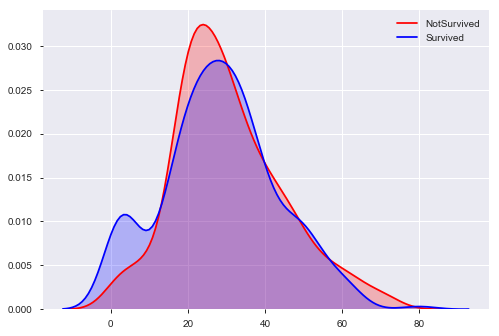

In [36]:
#补充Age的缺失值
index = list(data[data['Age'].isnull()].index) #Age 缺失样例的 index
Age_mean = np.mean(data[data['Age'].notnull()]['Age']) #求Age平均值
copy_data = data.copy()#复制数据
for i in index:
    filling_age = np.mean(copy_data[(copy_data['Pclass'] == copy_data.iloc[i]['Pclass'])
                                    #选出那些与当前缺失年龄的人的Pclass同档位一样的人
                                    & (copy_data['SibSp'] == copy_data.iloc[i]['SibSp'])
                                    #选出那些与当前缺失年龄的人的SibSp姊妹一样的人
                                    & (copy_data['Parch'] == copy_data.iloc[i]['Parch'])
                                    #选出那些与当前缺失年龄的人的Parch父母子女一样的人
                                    ]['Age'])#的年龄平均数
    if not np.isnan(filling_age): # filling_age 非空为真 有这样的人
        data['Age'].iloc[i] = filling_age #填充 null 值
    else: # filling_age 空为真 没这样的人就填所有人Age均值28.235555555555557
        data['Age'].iloc[i] = Age_mean
g = sns.kdeplot(Age0, legend=True, shade=True, color='r', label='NotSurvived')
g = sns.kdeplot(Age1, legend=True, shade=True, color='b', label='Survived')

发现对是否生存的性质并无产生影响

Embarked  缺失2
对于只有极少数缺失值的特征，我们可以选择删除该样例，使用众数、均值、中位数填充。  
  
Cabin  缺失687 船舱数据如C85 C123
对于这种复杂，高维的数据，我们需要挖掘它的规律。例如 Cabin 特征值由字母开头，判断船舱按字母分为 A，B，C...  
 
于是我们仅提取字母编号，降低维度。然后使用新的字母‘U’填充缺失数据。 

#### 处理Cabin的缺失值

In [38]:
data[data['Cabin'].notnull()]['Cabin'].head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [41]:
list(set([i[:1] for i in data[data['Cabin'].notnull()]['Cabin']]))

['T', 'B', 'A', 'G', 'D', 'F', 'E', 'C']

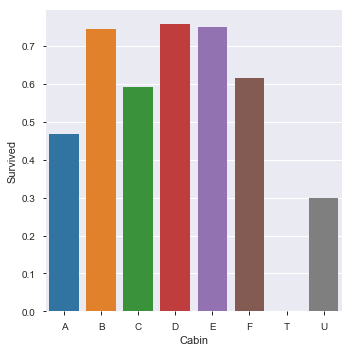

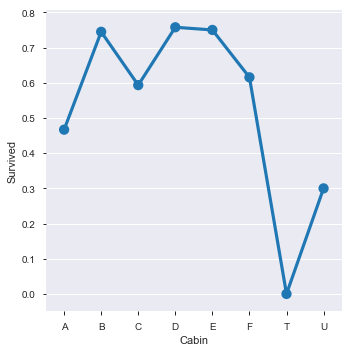

In [62]:
# fillna() 填充 null 值
data['Cabin'].fillna('U',inplace=True) 

# 使用 lambda 表达式定义匿名函数对 i 执行 list(i)[0]。map() 指对指定序列 data ['Cabin'] 进行映射，对每个元素执行 lambda 
data['Cabin']=data['Cabin'].map(lambda i: list(i)[0]) 

# kind='bar' 绘制条形图，ci=False 不绘制概率曲线，order 设置横坐标次序
g = sns.factorplot(x='Cabin',y='Survived',data=data,ci=False,kind='bar',order=['A','B','C','D','E','F','T','U'])
gg = sns.factorplot(x='Cabin',y='Survived',data=data,ci=False,order=['A','B','C','D','E','F','T','U']) 

In [53]:
pd.Series(['111','222','533']).map(lambda i:list(i))

0    [1, 1, 1]
1    [2, 2, 2]
2    [5, 3, 3]
dtype: object

In [54]:
list('111')

['1', '1', '1']

In [52]:
pd.DataFrame(np.array(['111','222','533']))

,0
0,111
1,222
2,533


In [49]:
type(data['Cabin'])

pandas.core.series.Series

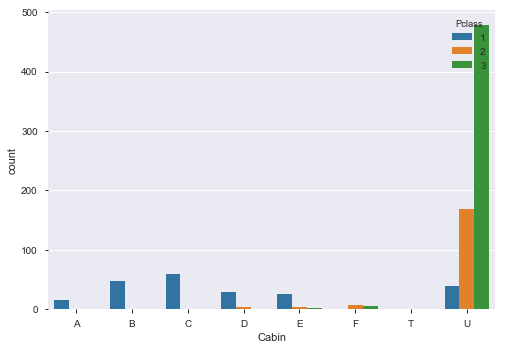

In [63]:
g = sns.countplot(x='Cabin',hue='Pclass',data=data,order=['A','B','C','D','E','F','T','U']) # hue='Pclass' 表示根据 'Pclass' 进行分类

从上面的图中看得出，缺失数据的游客主要是三等舱的，并且这部分游客的生存率相对较低。

### 偏态分布  Log Transformation
偏态分布的数据有时不利于模型发现数据中的规律，我们可以使用 Log Transformation 来处理数据，   
参考 Skewed Distribution and Log Transformation   

#### 看Fare工资

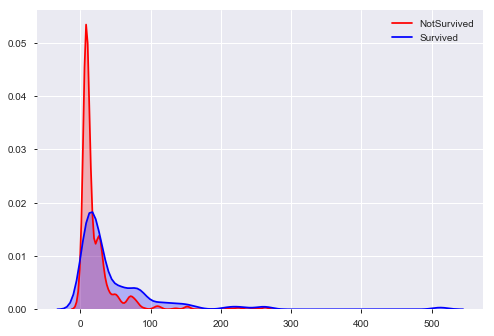

In [65]:
g=sns.kdeplot(data[data['Survived']==0]['Fare'],shade='True',label='NotSurvived',color='r') # 死亡乘客 'Fare' 分布
g=sns.kdeplot(data[data['Survived']==1]['Fare'],shade='True',label='Survived',color='b') # 生存乘客 'Fare' 分布

In [4]:
data[data['Survived']==0]['Fare']

0        7.2500
4        8.0500
5        8.4583
6       51.8625
7       21.0750
12       8.0500
13      31.2750
14       7.8542
16      29.1250
18      18.0000
20      26.0000
24      21.0750
26       7.2250
27     263.0000
29       7.8958
30      27.7208
33      10.5000
34      82.1708
35      52.0000
37       8.0500
38      18.0000
40       9.4750
41      21.0000
42       7.8958
45       8.0500
46      15.5000
48      21.6792
49      17.8000
50      39.6875
51       7.8000
         ...   
844      8.6625
845      7.5500
846     69.5500
847      7.8958
848     33.0000
850     31.2750
851      7.7750
852     15.2458
854     26.0000
859      7.2292
860     14.1083
861     11.5000
863     69.5500
864     13.0000
867     50.4958
868      9.5000
870      7.8958
872      5.0000
873      9.0000
876      9.8458
877      7.8958
878      7.8958
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
888     23.4500
890      7.7500
Name: Fare, Length: 549,

Fare 属于右偏态分布，Python 提供了计算数据偏态系数的函数 skew(), 计算值越大，数据偏态越明显。
使用 Log Transformation 后，我们看到计算值从 4.79 降到 0.44。

Skew Coefficient:4.79
Skew Coefficient:0.44


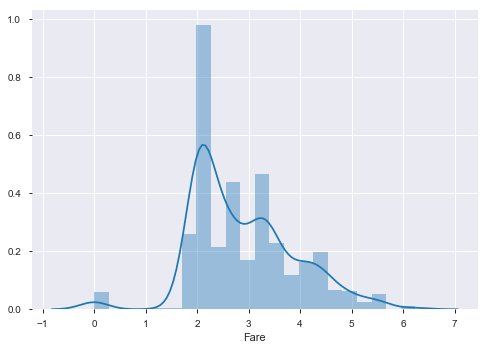

In [66]:
print('Skew Coefficient:%.2f' %(data['Fare'].skew())) # skew() 计算偏态系数
data['Fare']=data['Fare'].map(lambda i:np.log(i) if i>0 else 0)
# 匿名函数为对非零数据进行 Log Transformation，否则保持零值
g=sns.distplot(data['Fare'])
print('Skew Coefficient:%.2f' %(data['Fare'].skew())) # skew() 计算偏态系数

### 数值化和标准化  
#### Ticket  正则过滤 get_dummies化成01向量
#### 即onehot
Ticket 特征值中的一串数字编号对我们没有意义，忽略。  
下面代码中，我们用正则表达式过滤掉这串数字，  
并使用 pandas get_dummies 函数进行数值化（以 Ticket 特征值 作为新的特征，0,1 作为新的特征值）。  

In [68]:
Ticket=[]
import re
r=re.compile(r'\w*')#正则表达式，查找所有单词字符[a-z/A-Z/0-9]
for i in data['Ticket']:
    sp=i.split(' ')#拆分空格前后字符串，返回列表
    if len(sp)==1:
       Ticket.append('U')#对于只有一串数字的 Ticket，Ticket 增加字符 'U'
    else:
       t=r.findall(sp[0])#查找所有单词字符，忽略符号，返回列表
       Ticket.append(''.join(t))#将 t 中所有字符串合并
data['Ticket']=Ticket


In [71]:
Ticket[:10]

['A5', 'PC', 'STONO2', 'U', 'U', 'U', 'U', 'U', 'U', 'U']

In [72]:
data=pd.get_dummies(data,columns=['Ticket'],prefix='T')
#get_dummies：如果DataFrame的某一列中含有k个不同的值，则可以派生出一个k列矩阵或DataFrame（其值全为1和0）
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC',
       'T_FCC', 'T_Fa', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH',
       'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP',
       'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP',
       'T_U', 'T_WC', 'T_WEP'],
      dtype='object')

In [73]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,T_A4,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_U,T_WC,T_WEP
0,0,3,male,22.0,1,0,1.981001,U,S,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,female,38.0,1,0,4.266662,C,C,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,female,26.0,0,0,2.070022,U,S,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,female,35.0,1,0,3.972177,C,S,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,male,35.0,0,0,2.085672,U,S,0,...,0,0,0,0,0,0,0,1,0,0


### Sex 换成0和1
Sex 只有 male, female 两个特征值，用 0 替代 male, 1 替代 female。

In [74]:
data['Sex'].replace('male',0,inplace=True)#inplace=True 原位替换
data['Sex'].replace('female',1,inplace=True)

### 离群点检测
离群点是显著偏离数据集中其余对象的点。离群点来源于操作失误，数据本身的可变性等。
在不同的环境中，离群点扮演不同角色。例如一个人的年龄 300 岁，应予以删除，
而某些环境中，我们却需要探测、研究离群点，例如欺诈检测。

我们这里采用箱线法, 检测特征 ['Age', 'Parch', 'SibSp', 'Fare'] 的离群点。参考离群点和箱线法

In [85]:
from collections import Counter

def outlier_detect(n, df, features):#定义函数 outlier_detect 探测离群点，输入变量 n, df, features，返回 outlier
    outlier_index = []
    for feature in features:
        Q1 = np.percentile(df[feature], 25)#计算上四分位数（1/4）
        Q3 = np.percentile(df[feature], 75)#计算下四分位数（3/4）
        IQR = Q3 - Q1
        outlier_span = 1.5 * IQR
        col = ((data[data[feature] > Q3 + outlier_span]) |
               (data[data[feature] < Q1 - outlier_span])).index
        outlier_index.extend(col)
        print('%s: %f (Q3+1.5*IQR) , %f (Q1-1.5*QIR) )' %
              (feature, Q3 + outlier_span, Q1 - outlier_span))
    outlier_index = Counter(outlier_index)#计数
    outlier = list(i for i, j in outlier_index.items() if j >= n)#离群点大于输入个数n的
    print('number of outliers: %d' % len(outlier))
    print(df[features].loc[outlier])
    return outlier

outlier = outlier_detect(3, data, ['Age', 'Parch', 'SibSp', 'Fare'])#调用函数 outlier_detect

Age: 59.500000 (Q3+1.5*IQR) , -0.500000 (Q1-1.5*QIR) )
Parch: 0.000000 (Q3+1.5*IQR) , 0.000000 (Q1-1.5*QIR) )
SibSp: 2.500000 (Q3+1.5*IQR) , -1.500000 (Q1-1.5*QIR) )
Fare: 5.482703 (Q3+1.5*IQR) , 0.019461 (Q1-1.5*QIR) )
number of outliers: 4
      Age  Parch  SibSp      Fare
438  64.0      4      1  5.572154
27   19.0      2      3  5.572154
88   23.0      2      3  5.572154
341  24.0      2      3  5.572154


In [91]:
outlier

[438, 27, 88, 341]

这里我们检测出 4 个离群点，使用 drop 函数删除即可。

In [92]:
data.drop(outlier)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,T_A4,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_U,T_WC,T_WEP
0,0,3,0,22.000000,1,0,1.981001,U,S,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,38.000000,1,0,4.266662,C,C,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,26.000000,0,0,2.070022,U,S,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1,35.000000,1,0,3.972177,C,S,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,0,35.000000,0,0,2.085672,U,S,0,...,0,0,0,0,0,0,0,1,0,0
5,0,3,0,28.235556,0,0,2.135148,U,Q,0,...,0,0,0,0,0,0,0,1,0,0
6,0,1,0,54.000000,0,0,3.948596,E,S,0,...,0,0,0,0,0,0,0,1,0,0
7,0,3,0,2.000000,3,1,3.048088,U,S,0,...,0,0,0,0,0,0,0,1,0,0
8,1,3,1,27.000000,0,2,2.409941,U,S,0,...,0,0,0,0,0,0,0,1,0,0
9,1,2,1,14.000000,1,0,3.403555,U,C,0,...,0,0,0,0,0,0,0,1,0,0


In [82]:
lj=[11]
print(lj.extend([11]))
lj

None


[11, 11]

In [84]:
from collections import Counter
Counter(lj)

Counter({11: 2})

In [93]:
data.to_csv(r'data1.csv')

### 实验总结
本实验我们介绍了数据清洗的基本思路，大家不仅需要掌握数据清洗的基础知识，还要善于利用数据分析工具。同时，不同环境，数据清洗的方法不同，这就要求我们多做练习。  

### 课后作业
判断特征 Age 是否属于偏态分布  
补全 Cabin 缺失值后，对该特征进行数值化处理  
补全 Embarked 缺失值，对该特征进行数值化处理  
思考 2.2.6 节中的得到的离群点是否应该删除  

# 分类模型训练及评价  
实验内容  
实验将评估不同模型的测试精度以及过拟合问题。  
学习器没有最好，只有适不适合，模型评估和性能度量的重要性可想而知。  
比起上节课，这节课将会轻松愉快很多。我们重点在模型评估的实现过程，  
对分类算法不了解的不用担心，实验 3 中，我们将对算法以及进行深入学习。  

实验知识点
## 交叉验证法 过拟合 学习曲线

模型评估
模型选择
学习器在**训练集**上的误差称为 **“训练误差”** 或者 “经验误差”，在**新的样本**上的误差称为**“泛化误差”**。我们希望得到的是泛化误差小的学习器。通常，我们利用“测试集” 来测试学习器对新样本的判别能力，**以得到的 “测试误差” 来近似泛化误差**。基于这种思想的学习器的评估方法，有**留出法、k 折交叉验证法、留一法、自助法**：

留出法 (hold-out)：将数据集 D 划分为训练集 S 和测试集 T。通常 S 与 T 比例为 2/3 ~ 4/5。

**k 折交叉验证（k-fold cross validation）：将 D 划分 k 个大小相似的子集（每份子集尽可能保持数据分布的一致性：子集中不同类别的样本数量比例与 D 基本一致），其中一份作为测试集，剩下 k-1 份为训练集 T，操作 k 次。 例如 D 划分为 D1，D2，... ，D10，第一次使用 D1 作为测试集，第二次使用 D2，第三次使用 D3， ... ， 第十次使用 D10 作为测试集。最后计算 k 次测试误差的平均值近似泛化误差。**

留一法（Leave-One-out）：k 折交叉验证法的特例，即每次测试集 T 只留一个数据，剩下的作为训练集 S

自助法（bootstrapping）：每次从数据集 D 中有放回地采一个样本，并将这个样本放入训练集 S 中，重复 m 次。则训练集中有 m 个训练样本，将未在训练集中的样本放入测试集 T。

留出法和 k 折交叉验证法需要划分一部分样本作为测试集，就引入由于训练样本规模不同而产生的偏差。留一法改善了这一问题，但计算复杂度高。自助法也改善了这一个问题，但改变了数据集分布，同样会引入偏差，该方法适合数据集较小的情况。所以，留出法和 k 折交叉验证法是最常用的。这里选择 k 折交叉验证法进行模型评估。

Python sklearn.model_selection 提供了 Stratified k-fold。参考 Stratified k-fold
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold
我推荐使用 sklearn cross_val_score。这个函数输入我们选择的算法、数据集 D，k 的值，输出训练精度（误差是错误率，精度是正确率）。对于分类问题，默认采用 stratified k-fold 方法。参考 sklearn cross_val_score
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
下面我们用 10 折交叉验证法（k=10）对两种常用的集成学习算法 AdaBoost 以及 Random Forest 进行评估。最后我们看到 Random Forest 比 Adaboost 效果更好。

In [94]:
data=pd.read_csv(r"data1.csv")

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_U,T_WC,T_WEP
0,0,0,3,0,22.000000,1,0,1.981001,U,S,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,38.000000,1,0,4.266662,C,C,...,0,0,0,0,0,0,0,0,0,0
2,2,1,3,1,26.000000,0,0,2.070022,U,S,...,0,0,0,0,0,1,0,0,0,0
3,3,1,1,1,35.000000,1,0,3.972177,C,S,...,0,0,0,0,0,0,0,1,0,0
4,4,0,3,0,35.000000,0,0,2.085672,U,S,...,0,0,0,0,0,0,0,1,0,0
5,5,0,3,0,28.235556,0,0,2.135148,U,Q,...,0,0,0,0,0,0,0,1,0,0
6,6,0,1,0,54.000000,0,0,3.948596,E,S,...,0,0,0,0,0,0,0,1,0,0
7,7,0,3,0,2.000000,3,1,3.048088,U,S,...,0,0,0,0,0,0,0,1,0,0
8,8,1,3,1,27.000000,0,2,2.409941,U,S,...,0,0,0,0,0,0,0,1,0,0
9,9,1,2,1,14.000000,1,0,3.403555,U,C,...,0,0,0,0,0,0,0,1,0,0


In [95]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

data.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,T_A4,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_U,T_WC,T_WEP
0,0,3,0,22.0,1,0,1.981001,U,S,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,38.0,1,0,4.266662,C,C,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,26.0,0,0,2.070022,U,S,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1,35.0,1,0,3.972177,C,S,0,...,0,0,0,0,0,0,0,1,0,0
4,0,3,0,35.0,0,0,2.085672,U,S,0,...,0,0,0,0,0,0,0,1,0,0


## 将字符串改成0，1，2

In [ ]:
from collections import Counter

In [102]:
Counter(data['Cabin'])

Counter({'U': 687,
         'C': 59,
         'E': 32,
         'G': 4,
         'D': 33,
         'A': 15,
         'B': 47,
         'F': 13,
         'T': 1})

In [104]:
data['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [99]:
list(set(data['Embarked']))

['Q', nan, 'S', 'C']

In [100]:
data['Embarked'].fillna('U',inplace=True)

In [103]:
Counter(data['Embarked'])

Counter({'S': 644, 'C': 168, 'Q': 77, 'U': 2})

In [105]:
clos = ['Cabin','Embarked']

for clo in clos:
    u = data[clo].unique()
    
    def conver(x):
        return np.argwhere(u==x)[0,0]
    
    data[clo] =data[clo].map(conver)
    

In [109]:
Counter(data['Embarked'])

Counter({0: 644, 1: 168, 2: 77, 3: 2})

In [108]:
Counter(data['Cabin'])

Counter({0: 687, 1: 59, 2: 32, 3: 4, 4: 33, 5: 15, 6: 47, 7: 13, 8: 1})

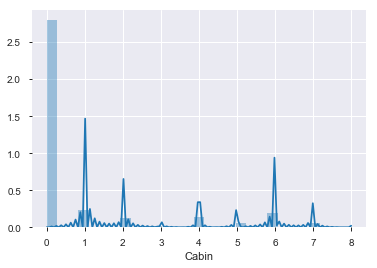

In [110]:
sns.distplot(data['Cabin'])

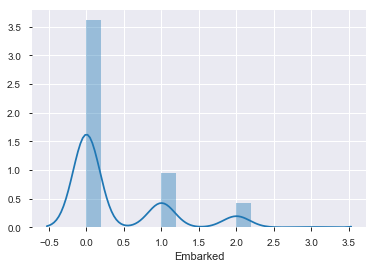

In [111]:
sns.distplot(data['Embarked'])

In [112]:
data=pd.get_dummies(data,columns=['Cabin'],prefix='C')
data=pd.get_dummies(data,columns=['Embarked'],prefix='E')

In [113]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'T_A4',
       'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa',
       'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW',
       'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2',
       'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_SWPP', 'T_U', 'T_WC',
       'T_WEP', 'C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8',
       'E_0', 'E_1', 'E_2', 'E_3'],
      dtype='object')

In [116]:
y = data['Survived']##标签
X = data.drop(['Survived'], axis=1).values##特征

classifiers = [AdaBoostClassifier(
    random_state=2), RandomForestClassifier(random_state=2)]
for clf in classifiers:
    score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')#cv=10：10 折交叉验证法，scoring='accuracy'：返回测试精度
    print([np.mean(score)])#显示测试精度平均值
#先adaboost再randomforest adaboost结果还好一些

[0.808210759278175]
[0.8081358529111338]


In [97]:
X

array([[3, 0, 22.0, ..., 0, 0, 0],
       [1, 1, 38.0, ..., 0, 0, 0],
       [3, 1, 26.0, ..., 0, 0, 0],
       ...,
       [3, 1, 13.5, ..., 0, 1, 0],
       [1, 0, 26.0, ..., 1, 0, 0],
       [3, 0, 32.0, ..., 1, 0, 0]], dtype=object)

## 性能度量 学习曲线 看训练过程  
过拟合是学习器性能过好，把样本的一些特性当做了数据的一般性质，从而导致训练误差低但泛化误差高。  
**学习曲线是判断过拟合的一种方式**，同时可以判断学习器的表现。  
学习曲线**包括训练误差（或精度）随样例数目的变化曲线**与**测试误差（或精度）随样例数目的变化曲线**。  
  
下面我将以训练样例数目为横坐标，训练精度和测试精度为纵坐标绘制学习曲线，  
并分析**Random Forest**算法的性能。大家可以参考这篇博客进行深入学习 学习曲线  https://www.cnblogs.com/llhthinker/p/5399827.html

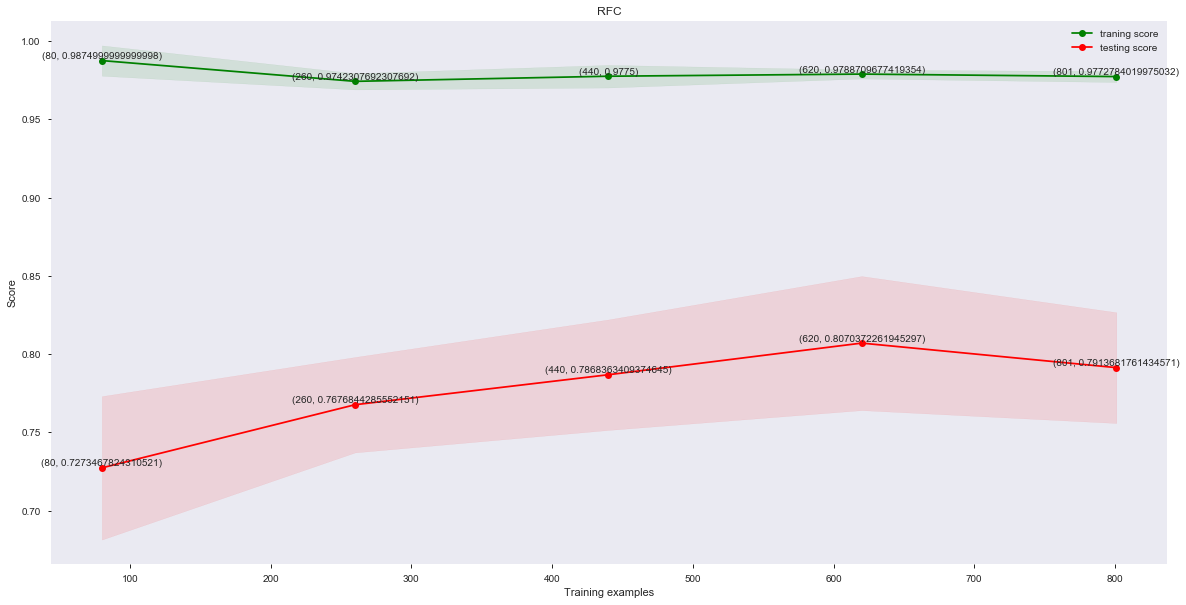

In [123]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# 定义函数 plot_learning_curve 绘制学习曲线。
#train_sizes 初始化为 array([ 0.1  ,  0.325,  0.55 ,  0.775,  1\.   ]),
#cv 初始化为 10，以后调用函数时不再输入这两个变量

def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(20,10))
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes)#画学习曲线 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    for a, b in zip(train_sizes, train_scores_mean):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    for a, b in zip(train_sizes, test_scores_mean):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    plt.legend(loc='best')
    return plt

g = plot_learning_curve(RandomForestClassifier(), 'RFC', X, y) # 调用函数 plot_learning_curve 绘制随机森林学习器学习曲线

Random Forest 的学习曲线我们得到了，训练误差始终接近 0，而测试误差始终偏高，  
说明存在过拟合的问题。这个问题的产生是因为 Random Forest 算法使用决策树作为基学习器  
，而决策树的一些特性将造成较严重的过拟合。这个问题的具体原因以及解决方法将在下一节课讲解。  
  
实验总结  
本实验我们使用交叉验证法以及学习曲线对模型选择和性能评估进行了实例讲解，  
并练习使用 sklearn 机器学习工具。下节课我们将深入学习如何真的随机森林分类器调参。  

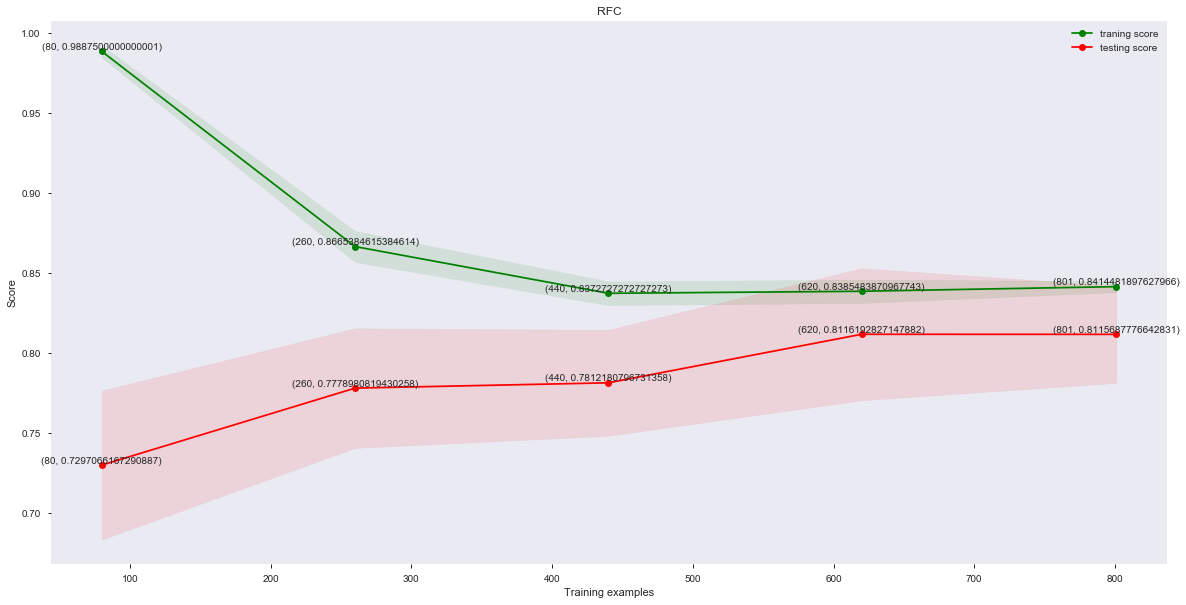

In [124]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# 定义函数 plot_learning_curve 绘制学习曲线。
#train_sizes 初始化为 array([ 0.1  ,  0.325,  0.55 ,  0.775,  1\.   ]),
#cv 初始化为 10，以后调用函数时不再输入这两个变量

def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(20,10))
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes)#画学习曲线 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    for a, b in zip(train_sizes, train_scores_mean):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    for a, b in zip(train_sizes, test_scores_mean):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    plt.legend(loc='best')
    return plt

g = plot_learning_curve(AdaBoostClassifier(), 'RFC', X, y) # 调用函数 plot_learning_curve 绘制随机森林学习器学习曲线

**注意 这边明显可以看出用Adaboost效果会好很多很多**

In [127]:
data.to_csv(r'data2.csv')

# 随机森林分类器及其参数调节

实验内容  
## 决策树 集成学习 随机森林算法 参数调节
本实验我们将学习集成学习的随机森林算法，参数调节，并解决上一节实验当中遇到的过拟合问题。  
我们将继续使用 Python sklean 机器学习工具。  

注意：本节实验与上一节实验是衔接的，请在上一节的基础上继续操作。  
 
实验知识点  
决策树  
集成学习  
随机森林算法  
参数调节  
衔接上一节  
本实验衔接着上一个实验，我们需要导入先前的模块和载入数据  

In [129]:
data=pd.read_csv(r"data2.csv")

In [130]:
data.head(5)

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,T_A4,T_A5,...,C_3,C_4,C_5,C_6,C_7,C_8,E_0,E_1,E_2,E_3
0,0,0,3,0,22.0,1,0,1.981001,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,1,38.0,1,0,4.266662,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1,3,1,26.0,0,0,2.070022,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,1,1,1,35.0,1,0,3.972177,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,3,0,35.0,0,0,2.085672,0,0,...,0,0,0,0,0,0,1,0,0,0


In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


y = data['Survived']
X = data.drop(['Survived'], axis=1).values

### 实验原理

#### 决策树

学习随机森林算法，首先需要了解决策树。这里可以参考 [通俗易懂之决策树](https://zhuanlan.zhihu.com/p/30059442)。以下知识点需要大家提前理解：

- 决策树的属性选择：划分属性时，在当前节点下，在属性集合中，选择最优的属性。
- **决策树的深度 n 对学习器性能的影响: n 太小有欠拟合风险，太大有过拟合风险。**
- 划分选择算法： gini（基尼） 以及 entropy（熵）。

#### 集成学习

集成学习就是构建并结合多个个体学习器（称为基学习器））来完成学习任务。举一个例子。下表中√ 表示分类正确，× 表示分类错误。

|       *           | 学习器 1 | 学习器 2 | 学习器 3 |
| ---------------- | -------- | -------- | -------- |
| h1               | √        | √        | ×        |
| h2               | ×        | √        | √        |
| h3               | √        | ×        | √        |
| 集成（提升性能） | √        | √        | √        |

|      *            | 学习器 1 | 学习器 2 | 学习器 3 |
| ---------------- | -------- | -------- | -------- |
| h1               | √        | √        | ×        |
| h2               | √        | √        | ×        |
| h3               | √        | √        | ×        |
| 集成（不起作用） | √        | √        | ×        |

|       *           | 学习器 1 | 学习器 2 | 学习器 3 |
| ---------------- | -------- | -------- | -------- |
| h1               | ×        | ×        | √        |
| h2               | ×        | √        | ×        |
| h3               | √        | ×        | ×        |
| 集成（起负作用） | ×        | ×        | ×        |

由上面三个表，我们看到**集成学习器是通过少数服从多数的原则来进行分类结果的最终选择，这就要求我们的基学习器具有第一个表的特性：性能好，并且不一样（即好而不同）。随着基学习器数目的增加，集成的错误率剧烈下降直至为 0**。

#### 随机森林

**随机森林以决策树为基学习器**。但是属性选择与决策树不同。随机森林中，**基决策树学习器在每个节点上，从该节点的属性集合中随机选择包含 K 个属性的子集，再从子集中选择最优属性用于划分**。这就满足 “好而不同” 的条件。随机森林计算开销小，是现在机器学习算法当中水平较高的算法。

###### Python sklearn 参数调节

![image](https://doc.shiyanlou.com/document-uid598017labid4262timestamp1513834446518.png)

| 参数              |                                                        | 特点                                           |*
| ----------------- | ------------------------------------------------------ | ---------------------------------------------- |
| n_estimators      | 基学习器数目（默认值 10）                              | 基本趋势是值越大精度越高 ，直到达到一个上限    |
| criterion         | 选择算法 gini 或者 entropy (默认 gini)                 | 视具体情况定                                   |
| max_features      | 2.2.3 节中子集的大小，即 k 值（默认 sqrt(n_features)） |                                                |
| max_depth         | 决策树深度                                             | 过小基学习器欠拟合，过大基学习器过拟合。粗调节 |
| max_leaf_nodes    | 最大叶节点数（默认无限制）                             | 粗调节                                         |
| min_samples_split | 分裂时最小样本数，默认 2                               | 细调节, 越小模型越复杂                         |
| min_samples_leaf  | 叶节点最小样本数，默认 2                               | 细调节，越小模型越复杂                         |
| bootstrap         | 是否采用自助法进行样本抽样（默认使用）                 | 决定基学习器样本是否一致                       |

在以上参数中，只有 n_estimators 对精度的影响是单调的。粗调节表示参数选择跨度大，以 10、100 等为单位。细调节参数选择跨度小，以 1、2 等为单位。

### 代码实现

#### 交叉验证法调参

我们首先调节：`n_estimators`，`max_depth`。首先观察特征数目，这决定了 `max_depth` 等参数的范围。然后使用交叉验证法调参。

得到最优参数 `n_estimators=60，max_depth=8`。

In [132]:
len(X[0])

50

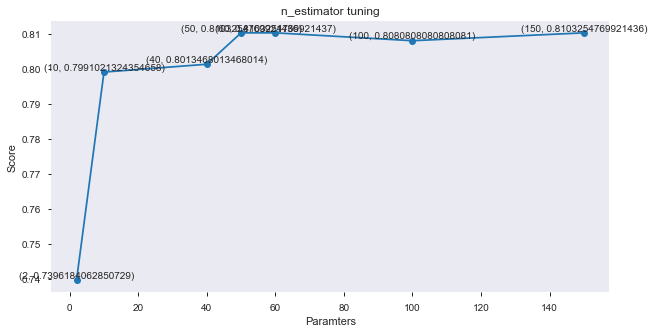

In [137]:
def para_tune(para, X, y): #
    clf = RandomForestClassifier(n_estimators=para) # n_estimators 设置为 para
    score = np.mean(cross_val_score(clf, X, y, scoring='accuracy'))
    return score

def accurate_curve(para_range, X, y, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X, y))
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    for a, b in zip(para_range,  score):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    return plt

g = accurate_curve([2, 10,40, 50,60, 100, 150], X, y, 'n_estimator tuning')

n_estimators 最优60

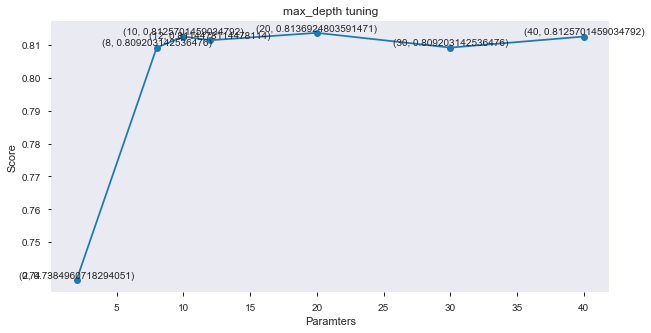

In [143]:
def para_tune(para, X, y):
    clf = RandomForestClassifier(n_estimators=300, max_depth=para)
    score = np.mean(cross_val_score(clf, X, y, scoring='accuracy'))
    return score

def accurate_curve(para_range, X, y, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X, y))
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    for a, b in zip(para_range,  score):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    return plt

g = accurate_curve([2, 8,10, 12,20, 30, 40], X, y, 'max_depth tuning')

### scikit-learn 自动调参函数 GridSearchCV
接下来我们使用这个函数来选择最优的学习器，并绘制上一节实验学到的学习曲线。

观察学习曲线，训练精度随样例数目增加而减小，测试精度则增加，过拟合程度降低。并且从学习曲线的变化趋势看，测试精度将随着训练样例的数目的增加而进一步增加。实际上，决策树的深度以及基学习器的数目起主要的作用。

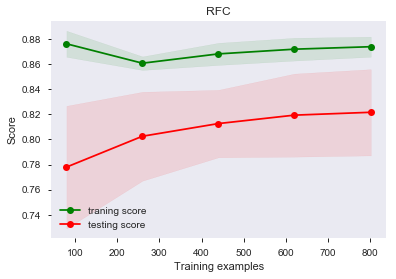

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    plt.legend(loc='best')
    return plt

clf = RandomForestClassifier()
para_grid = {'max_depth': [10], 'n_estimators': [100], 'max_features': [1, 5, 10], 'criterion': ['gini', 'entropy'],
             'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}#对以上参数进行网格搜索
gs = GridSearchCV(clf, param_grid=para_grid, cv=3, scoring='accuracy')
gs.fit(X, y)
gs_best = gs.best_estimator_ #选择出最优的学习器
gs.best_score_ #最优学习器的精度

g = plot_learning_curve(gs_best, 'RFC', X, y)#调用实验2中定义的 plot_learning_curve 绘制学习曲线

实验总结
本小节学习了随机森林算法以及 sklearn 工具的使用。并且通过参数调节，缓解了过拟合现象。